<a href="https://colab.research.google.com/github/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/choixClimLogiqueFloue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Réglage climatiseur en flou avec skfuzzy

L'objectif est de pouvoir représenter des règles permettant de régler un climatiseur.

Très peu d'information sont données, principalement la table des actions sachant la perception actuelle et l'état désiré.


| Température ambiante\Objectif | très froid | froid | chaleureux | chaud | très chaud | 
| ----------------------------- | -----------| ----- | ---------- | ----- | ---------- | 
| très froid | stabiliser | chauffer | chauffer | chauffer vite | chauffer vite | 
| froid | refroidir | stabiliser | chauffer | chauffer | chauffer vite | 
| chaleureux | refroidir | refroidir | stabiliser | chauffer | chauffer | 
| chaud | refroidir vite | refroidir | refroidir | stabiliser | chauffer | 
| très chaud | refroidir vite | refroidir vite | refroidir | refroidir | stabiliser | 

Les températures vont de 0° (très froid) à 40° (très chaud).

Proposez une modélisation :
- des températures, 
- de la force de l'air sortant du climatiseur; vous choisirez l'intervalle pour coder les ordre 'refroidir vite' à 'chauffer vite' 
- ainsi que les règles qui correspondent au tableau.

---
### Installation et import python

Si scikit-fuzzy n'est pas installé, utilisez la ligne suivante (sous colab) :

In [ ]:
 #!pip install -U scikit-fuzzy
#en local, (thonny, pycharm, ...) enlever le '!'

In [2]:
#les imports
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

---
## les antécédents et les conséquents
- Les antécédents sont les variables utilisées pour prendre les décisions (ici observation et désir)
- les conséquents sont les déductions (ici l'ordre donné au )

In [3]:
#### Antecedent et Consequent
# meteo observee est située dans un intervale de 0 à 41 coupé par pas de 1 
observation = ctrl.Antecedent(np.arange(0,41,1), 'observation')
# meteo desiree est située dans un intervale de 0 à 41 coupé par pas de 1 
desir = ctrl.Antecedent(np.arange(0,41,1), 'desir')
# action desiree est située dans un intervale de [-1,1] par pas de 0.1
moteur = ctrl.Consequent(np.arange(-1,1.1,.1), 'moteur')

---
### ensembles flous
on définit ensuite les ensembles flous utilisés dans les antécédents et les conséquents.

Par exemple, on peut dire que la température est 'chaude' entre 20* et 25°, ...


In [4]:
temp_tres_froid = fuzz.sigmf(observation.universe, 5, -0.8)
temp_froid      = fuzz.gbellmf(observation.universe, 4, 2, 7.5)
temp_chaleureux = fuzz.gbellmf(observation.universe, 4, 2, 15)
temp_chaud      = fuzz.gbellmf(observation.universe, 4, 2, 22)
temp_tres_chaud = fuzz.sigmf(observation.universe, 25, 0.8)
#on affecte en nommant ces ensembles à l'antécédent "observation"
observation['tres_froid'] = temp_tres_froid
observation['froid'] = temp_froid
observation['chaleureux'] = temp_chaleureux
observation['chaud'] = temp_chaud
observation['tres_chaud'] = temp_tres_chaud


On peut vérifier les courbes d'appartenance : 
- *ici dans cette illustration, les courbes sont en cloche, mais vous pouvez les définir autrement*

c:\Users\emmanuel adam\Documents\GitHub\IntelligenceArtificiellePython\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


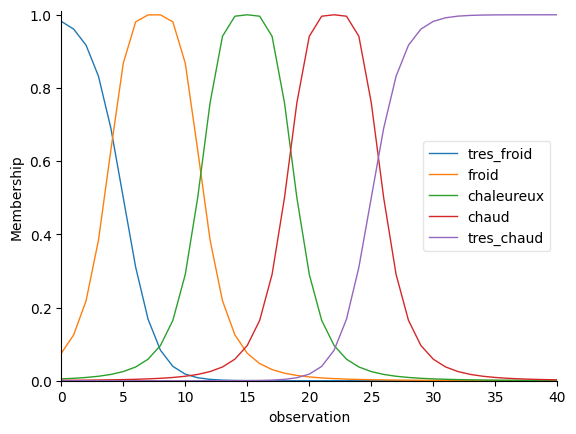

In [5]:
observation.view()

In [6]:
#A FAIRE
# de meme, affecter des ensembles flous pour l'antécédent "desir"
#on affecte en nommant ces ensembles à l'antécédent "observation"
desir['tres_froid'] = temp_tres_froid
desir['froid'] = temp_froid
desir['chaleureux'] = temp_chaleureux
desir['chaud'] = temp_chaud
desir['tres_chaud'] = temp_tres_chaud

---
#### Le climatiseur

Le climatiseur prend la décision de : 
- refroidir vite
- refroidir 
- stabiliser
- chauffer
- chauffer vite

Définissez les ensembles flous pour ce conséquent

In [7]:
# Définir les ensembles flous pour la prise de décision
refroidir_vite = fuzz.sigmf(moteur.universe, -0.5, -10)
refroidir      = fuzz.gbellmf(moteur.universe, 0.5, 2, -0.5)
stabiliser = fuzz.gbellmf(moteur.universe, 0.5, 2, 0)
chauffer      = fuzz.gbellmf(moteur.universe, 0.5, 2, 0.5)
chauffer_vite = fuzz.sigmf(moteur.universe, 0.5, 10)

#Et affecter ces ensembles au conséquent "moteur"
moteur['refroidir_vite'] = refroidir_vite
moteur['refroidir'] = refroidir
moteur['stabiliser'] = stabiliser
moteur['chauffer'] = chauffer
moteur['chauffer_vite'] = chauffer_vite


Ci-dessous une simple illustration d'ensembles flous pour le conséquent moteur. 

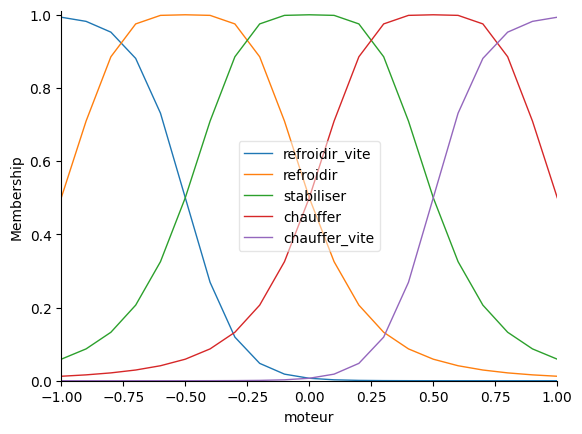

In [8]:
moteur.view()

---
## Définition des règles floues
Rappel, on souhaite définir : 

| Température ambiante\Objectif | très froid | froid | chaleureux | chaud | très chaud | 
| ----------------------------- | -----------| ----- | ---------- | ----- | ---------- | 
| très froid | stabiliser | chauffer | chauffer | chauffer vite | chauffer vite | 
| froid | refroidir | stabiliser | chauffer | chauffer | chauffer vite | 
| chaleureux | refroidir | refroidir | stabiliser | chauffer | chauffer | 
| chaud | refroidir vite | refroidir | refroidir | stabiliser | chauffer | 
| très chaud | refroidir vite | refroidir vite | refroidir | refroidir | stabiliser | 


Décrivez l'ensemble des règles qui représentent le comportement du climatiseur.

In [9]:

rules = []

rules.append(ctrl.Rule( observation['tres_froid'] &  desir['tres_froid'], moteur['stabiliser']))
rules.append(ctrl.Rule( observation['tres_froid'] &  desir['froid'], moteur['chauffer']))
rules.append(ctrl.Rule( observation['tres_froid'] &  desir['chaleureux'], moteur['chauffer']))
rules.append(ctrl.Rule( observation['tres_froid'] &  desir['chaud'], moteur['chauffer_vite']))
rules.append(ctrl.Rule( observation['tres_froid'] &  desir['tres_chaud'], moteur['chauffer_vite']))

rules.append(ctrl.Rule( observation['froid'] &  desir['tres_froid'], moteur['refroidir']))
rules.append(ctrl.Rule( observation['froid'] &  desir['froid'], moteur['stabiliser']))
rules.append(ctrl.Rule( observation['froid'] &  desir['chaleureux'], moteur['chauffer']))
rules.append(ctrl.Rule( observation['froid'] &  desir['chaud'], moteur['chauffer']))
rules.append(ctrl.Rule( observation['froid'] &  desir['tres_chaud'], moteur['chauffer_vite']))

rules.append(ctrl.Rule( observation['chaleureux'] &  desir['tres_froid'], moteur['refroidir']))
rules.append(ctrl.Rule( observation['chaleureux'] &  desir['froid'], moteur['refroidir']))
rules.append(ctrl.Rule( observation['chaleureux'] &  desir['chaleureux'], moteur['stabiliser']))
rules.append(ctrl.Rule( observation['chaleureux'] &  desir['chaud'], moteur['chauffer']))
rules.append(ctrl.Rule( observation['chaleureux'] &  desir['tres_chaud'], moteur['chauffer']))

rules.append(ctrl.Rule( observation['chaud'] &  desir['tres_froid'], moteur['refroidir_vite']))
rules.append(ctrl.Rule( observation['chaud'] &  desir['froid'], moteur['refroidir']))
rules.append(ctrl.Rule( observation['chaud'] &  desir['chaleureux'], moteur['refroidir']))
rules.append(ctrl.Rule( observation['chaud'] &  desir['chaud'], moteur['stabiliser']))
rules.append(ctrl.Rule( observation['chaud'] &  desir['tres_chaud'], moteur['chauffer']))

rules.append(ctrl.Rule( observation['tres_chaud'] &  desir['tres_froid'], moteur['refroidir_vite']))
rules.append(ctrl.Rule( observation['tres_chaud'] &  desir['froid'], moteur['refroidir_vite']))
rules.append(ctrl.Rule( observation['tres_chaud'] &  desir['chaleureux'], moteur['refroidir']))
rules.append(ctrl.Rule( observation['tres_chaud'] &  desir['chaud'], moteur['refroidir']))
rules.append(ctrl.Rule( observation['tres_chaud'] &  desir['tres_chaud'], moteur['stabiliser']))

In [10]:
#on décide d'utiliser toutes les règles en les compilant
clim_regles = ctrl.ControlSystem(rules)

#on crée un outil d'aide à la décision basé sur ces règles
clim_decision = ctrl.ControlSystemSimulation(clim_regles)

----
### Utilisation de l'outil flou d'aide à la décision 

Que faire si la pièce est à 34° et que l'on souhaite une température à 19° ?


In [12]:
clim_decision.input['observation'] = 34
clim_decision.input['desir'] = 19

clim_decision.compute()

print(clim_decision.output['moteur'])

-0.39871281422781124


Selon ce qui a été codé, il semblerait qu'il faille  rafraîchir normalement..
On peut voir les conséquents activés et leurs degrés d'activation avec cette fonction :  

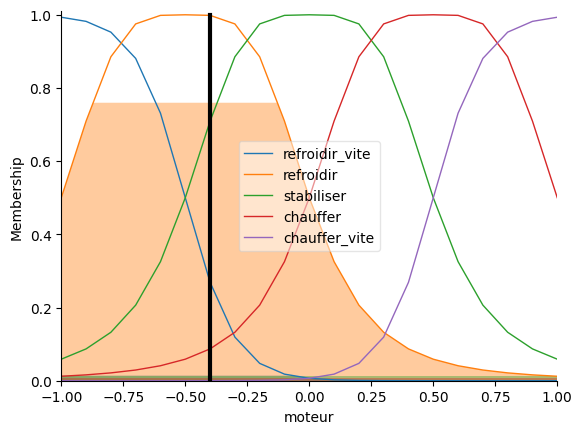

In [13]:
moteur.view(sim=clim_decision)

---
#### Impact des courbes
**A FAIRE**
- Changez les ensembles flous pour étudier l'impact sur le résultat
    - commentez vos résultats

---
### Aide explicite
**A FAIRE**
donnez un code python permettant de donner clairement la recommandation à la personne gérant la clim, et non plus une valeur. (ex : chauffer fortement plutôt que +0.8)

---